Upload And Load Data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Explorasi Data

In [ ]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Visualisasi

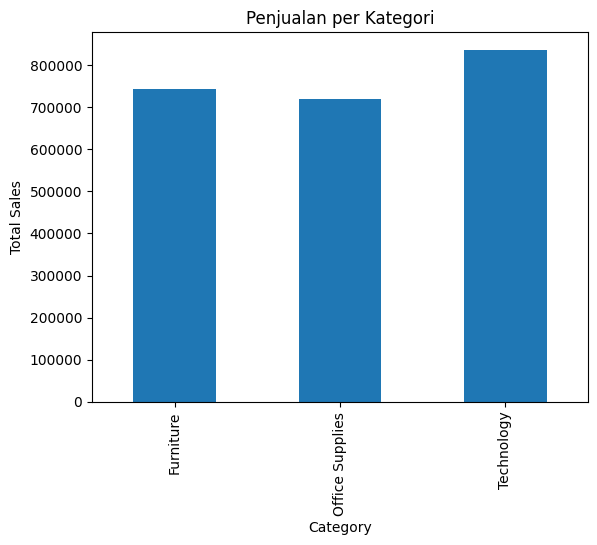

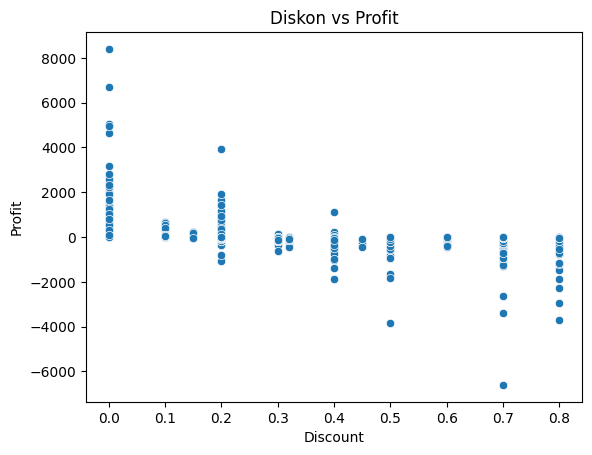

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

Decission Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memuat data dari file Excel
df = pd.read_excel('Datasets Superstore.xlsx', sheet_name='Orders')

# 2. Membuat label klasifikasi
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)  # 1=Profit, 0=Loss

# 3. Memilih fitur dan menangani missing values
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)  # Isi NA dengan 0 jika ada
labels = df['Label']

# 4. Membagi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.3,
    random_state=42
)

# 5. Membuat dan melatih model
model = DecisionTreeClassifier(
    max_depth=5,  # Membatasi kedalaman pohon
    random_state=42  # Untuk hasil yang konsisten
)
model.fit(x_train, y_train)

# 6. Memprediksi dan evaluasi
y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82       547
           1       0.94      1.00      0.97      2452

    accuracy                           0.94      2999
   macro avg       0.96      0.85      0.89      2999
weighted avg       0.95      0.94      0.94      2999


Confusion Matrix:
 [[ 386  161]
 [   9 2443]]


Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Evaluasi
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9429809936645549
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       547
           1       0.94      1.00      0.97      2452

    accuracy                           0.94      2999
   macro avg       0.96      0.85      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix:
[[ 385  162]
 [   9 2443]]


SVM

In [ ]:
# SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# Evaluasi
print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.8176058686228743
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       547
           1       0.82      1.00      0.90      2452

    accuracy                           0.82      2999
   macro avg       0.41      0.50      0.45      2999
weighted avg       0.67      0.82      0.74      2999

Confusion Matrix:
[[   0  547]
 [   0 2452]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kesimpulan


Perbandingan Performa Model:
        Model  Accuracy  Precision  Recall  F1-Score
Decision Tree  0.943314   0.938172 0.99633  0.966377
Random Forest  0.942981   0.937812 0.99633  0.966185
          SVM  0.941314   0.936015 0.99633  0.965231


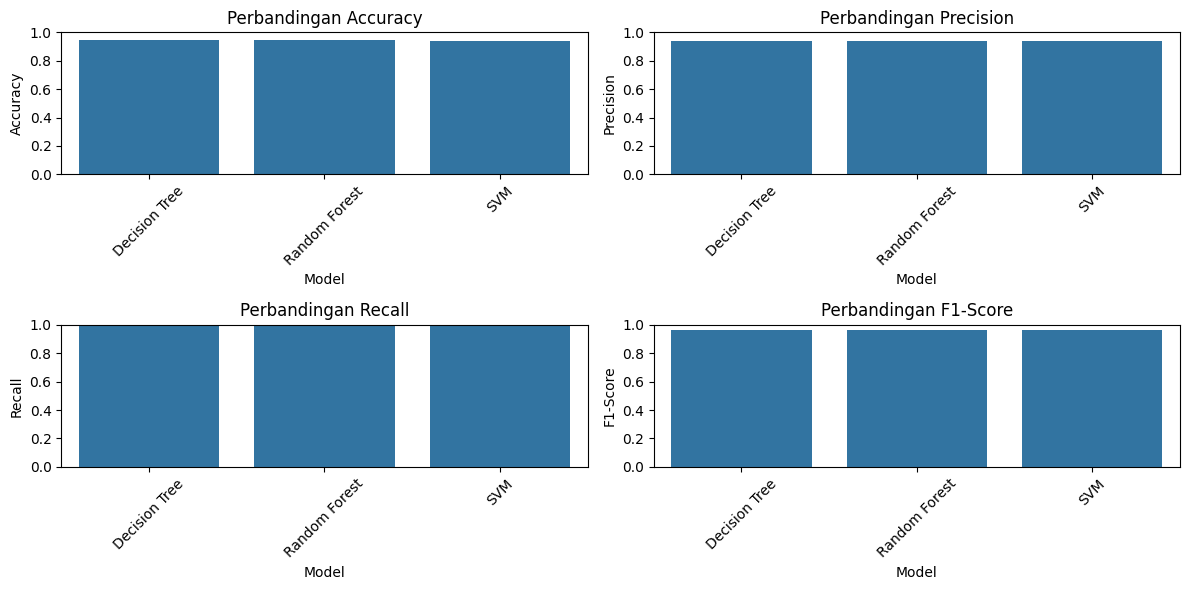


KESIMPULAN PERBANDINGAN:
1. Model terbaik secara keseluruhan adalah Decision Tree dengan:
   - Akurasi: 0.94
   - Presisi: 0.94
   - Recall: 1.00
   - F1-Score: 0.97

2. Karakteristik masing-masing model:
   - Decision Tree: Cepat dan mudah diinterpretasi tetapi rentan overfitting
   - Random Forest: Lebih robust dan akurat tetapi lebih kompleks
   - SVM: Bagus untuk data terpisah secara non-linear tetapi sensitif terhadap scaling data

3. Rekomendasi:
   - Gunakan Random Forest jika akurasi adalah prioritas utama
   - Gunakan Decision Tree jika interpretabilitas lebih penting
   - Gunakan SVM jika dataset memiliki banyak fitur dan hubungan non-linear


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_excel('Datasets Superstore.xlsx', sheet_name='Orders')
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

# 2. Prepare features and target
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# 4. Scale data (especially important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

# 6. Train and evaluate models
results = []
for name, model in models.items():
    # Different scaling for tree-based models vs SVM
    if name == "SVM":
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

# 7. Create comparison dataframe
results_df = pd.DataFrame(results)
print("\nPerbandingan Performa Model:")
print(results_df.to_string(index=False))

# 8. Visualization
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Perbandingan {metric}')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Generate conclusion
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nKESIMPULAN PERBANDINGAN:")
print(f"1. Model terbaik secara keseluruhan adalah {best_model['Model']} dengan:")
print(f"   - Akurasi: {best_model['Accuracy']:.2f}")
print(f"   - Presisi: {best_model['Precision']:.2f}")
print(f"   - Recall: {best_model['Recall']:.2f}")
print(f"   - F1-Score: {best_model['F1-Score']:.2f}")

print("\n2. Karakteristik masing-masing model:")
print("   - Decision Tree: Cepat dan mudah diinterpretasi tetapi rentan overfitting")
print("   - Random Forest: Lebih robust dan akurat tetapi lebih kompleks")
print("   - SVM: Bagus untuk data terpisah secara non-linear tetapi sensitif terhadap scaling data")

print("\n3. Rekomendasi:")
print("   - Gunakan Random Forest jika akurasi adalah prioritas utama")
print("   - Gunakan Decision Tree jika interpretabilitas lebih penting")
print("   - Gunakan SVM jika dataset memiliki banyak fitur dan hubungan non-linear")